In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
import random as rn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.pyplot import figure
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix

In [146]:
#Loading and formatting the data into a Pandas Dataframe
raw = load_iris()
data = np.c_[raw.data, raw.target]
columns = raw['feature_names'] + ['target']
df = pd.DataFrame(data, columns=columns)

In [3]:
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [145]:
#Renaming columns for easier plotting and use cases ahead
df = df.rename(columns={"sepal length (cm)":"sepLen" ,
                        "sepal width (cm)":"sepWid",
                        "petal length (cm)":"petLen",
                        "petal width (cm)":"petWid",
                        "target":"target"})
df.columns

Index(['sepLen', 'sepWid', 'petLen', 'petWid', 'target'], dtype='object')

In [143]:
#Correlation matrix for given variables
df.corr()

,sepLen,sepWid,petLen,petWid,target
sepLen,1.000000,-0.117570,0.871754,0.817941,0.782561
sepWid,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petLen,0.871754,-0.428440,1.000000,0.962865,0.949035
petWid,0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [6]:
sns.set_palette("icefire")

Text(0.5, 1.0, 'petLen/sepLen')

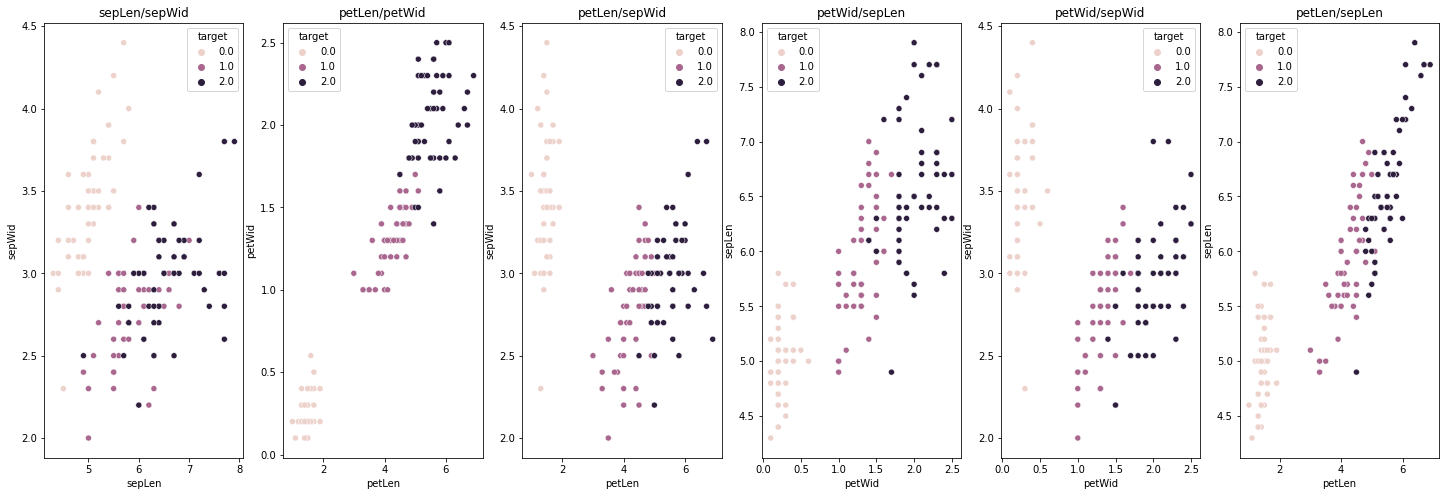

In [7]:
#Scatter plots for relations between all given variables with target class determining the hue value for corresponding values
fig, ax=plt.subplots(1,6)
fig = plt.gcf()
fig.set_size_inches(25, 8)
sns.scatterplot(x="sepLen", y="sepWid", hue="target", data=df, ax=ax[0])
ax[0].set_title("sepLen/sepWid")
sns.scatterplot(x="petLen", y="petWid", hue="target", data=df, ax=ax[1])
ax[1].set_title("petLen/petWid")
sns.scatterplot(x="petLen", y="sepWid", hue="target", data=df, ax=ax[2])
ax[2].set_title("petLen/sepWid")
sns.scatterplot(x="petWid", y="sepLen", hue="target", data=df, ax=ax[3])
ax[3].set_title("petWid/sepLen")
sns.scatterplot(x="petWid", y="sepWid", hue="target", data=df, ax=ax[4])
ax[4].set_title("petWid/sepWid")
sns.scatterplot(x="petLen", y="sepLen", hue="target", data=df, ax=ax[5])
ax[5].set_title("petLen/sepLen")

In [11]:
#seperating the dependant variable from independants
xData = df[['sepLen', 'sepWid', 'petLen', 'petWid']]
yData = df['target']

In [78]:
#using the holdout method for evaluation of the model
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size=0.3, random_state=1)

# Decision Tree classifier

In [139]:
DTmodel = DecisionTreeClassifier(criterion="entropy", splitter="best")
DTmodel.fit(xTrain, yTrain)

DecisionTreeClassifier(criterion='entropy')

In [140]:
yPred = DTmodel.predict(xTest)
accuracy_score(yPred, yTest)

0.9555555555555556

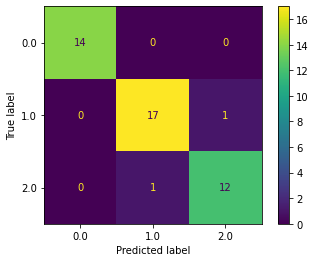

In [141]:
#confusion matrix
plot_confusion_matrix(DTmodel, xTest, yTest)

In [149]:
#text based visualization for the decision tree
print(tree.export_text(DTmodel))

|--- feature_3 <= 0.80
|   |--- class: 0.0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 5.00
|   |   |   |--- class: 1.0
|   |   |--- feature_2 >  5.00
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: 2.0
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2.0
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1.0
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2.0



# K Nearest Neighbors classifier

In [137]:
KNNmodel = KNeighborsClassifier(n_neighbors=3)
KNNmodel.fit(xTrain, yTrain)

KNeighborsClassifier(n_neighbors=3)

In [138]:
yPred = KNNmodel.predict(xTest)
accuracy_score(yPred, yTest)

0.9777777777777777

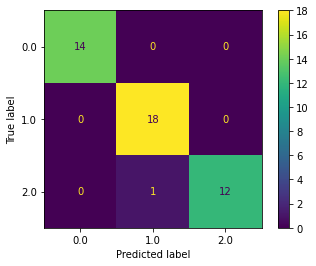

In [115]:
#confusion matrix
plot_confusion_matrix(KNNmodel, xTest, yTest)

In [142]:
#iterating through numbers for the value of K and printing the associated results
for x in range(1, len(xTrain), 10):
    KNNmodel = KNeighborsClassifier(n_neighbors=x)
    KNNmodel.fit(xTrain, yTrain)
    yPred = KNNmodel.predict(xTest)
    print(f'{round(accuracy_score(yPred, yTest)*100, 2)}% accuracy for K={x}')

97.78% accuracy for K=1
97.78% accuracy for K=11
97.78% accuracy for K=21
97.78% accuracy for K=31
95.56% accuracy for K=41
91.11% accuracy for K=51
84.44% accuracy for K=61
68.89% accuracy for K=71
66.67% accuracy for K=81
64.44% accuracy for K=91
60.0% accuracy for K=101


### With a increase in the number of neighbors the models fails to accurately predict an outcome because too many elements of the wrong class is taken into consideration. It still manages to hold up to a pretty big count for neighbors. In this case we see the maximum accuracy all the way upto K = ~30. Optimally looking at the scatter plot as classes 1 and 2 are tightly interacting a low count for K would prove to be suitable and I took 3 as the value for the same.

Thank you,  
Aryan Ghosh